# Análisis Inicial del Dataset y Preparación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Cargar datos
df = pd.read_csv('../data/teleCust1000t.csv')

# Información básica
print("Dimensiones del dataset:", df.shape)
print("\nInformación de columnas:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Dimensiones del dataset: (1000, 12)

Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

Estadísticas descriptivas:
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   

# Análisis de Valores Faltantes y Duplicados

In [2]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Verificar duplicados
duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicates}")

Valores faltantes por columna:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Registros duplicados: 0


# 3 Análisis de la Variable Objetivo (custcat)


Porcentaje por categoría:
custcat
3    28.1
1    26.6
4    23.6
2    21.7
Name: proportion, dtype: float64


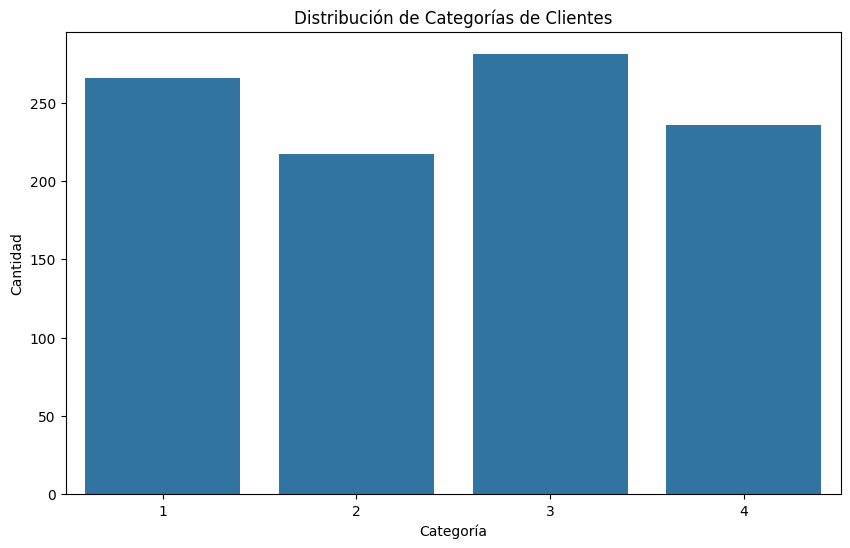

In [3]:
# Distribución de clases
plt.figure(figsize=(10, 6))
class_dist = df['custcat'].value_counts()
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribución de Categorías de Clientes')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Calcular desbalanceo
print("\nPorcentaje por categoría:")
print((df['custcat'].value_counts(normalize=True) * 100).round(2))

# 4 Análisis de Variables Numéricas

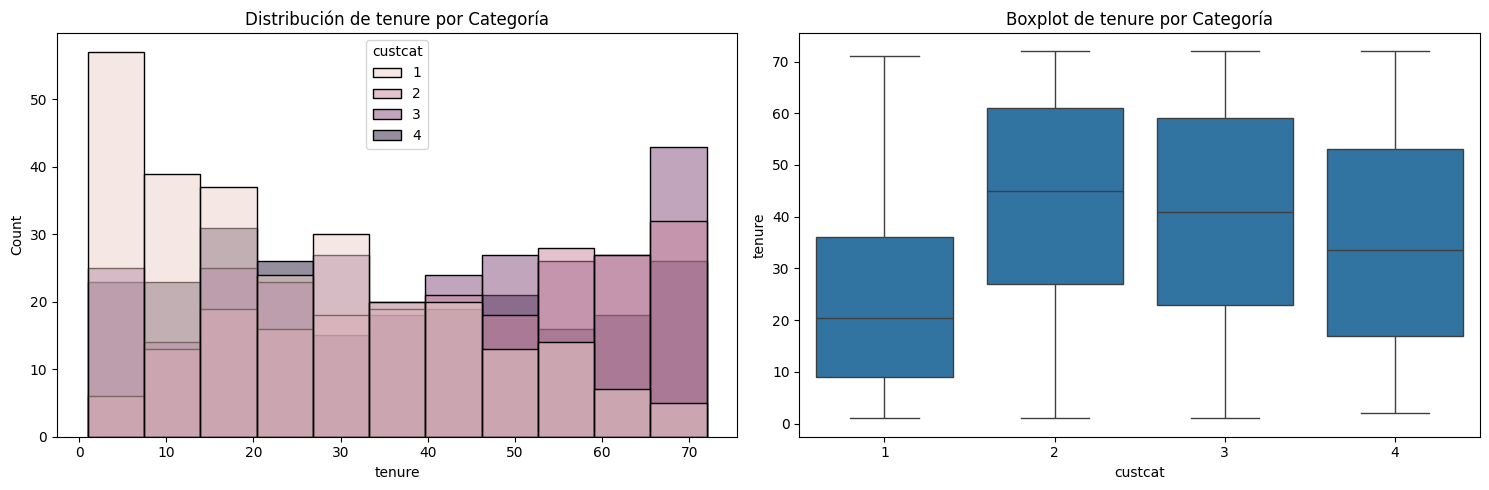

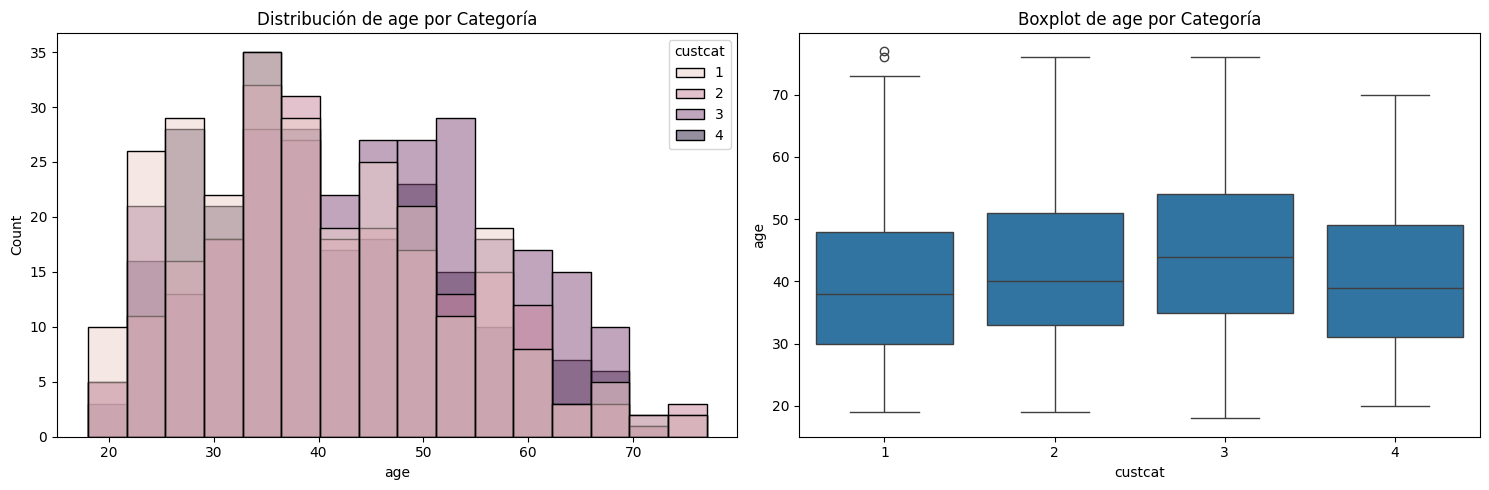

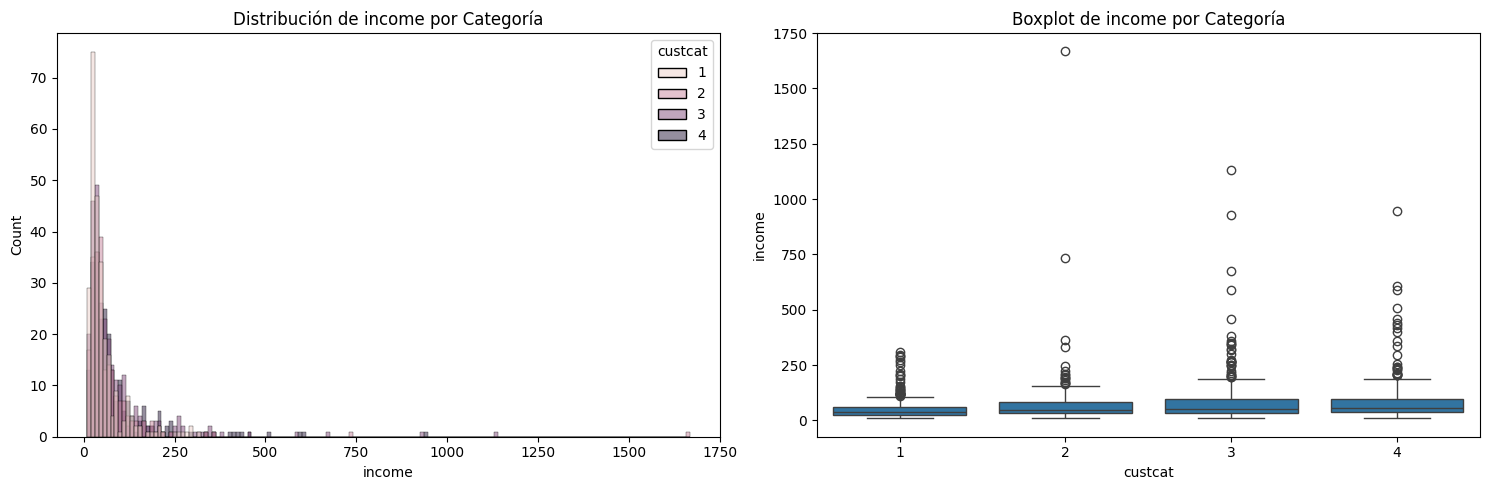

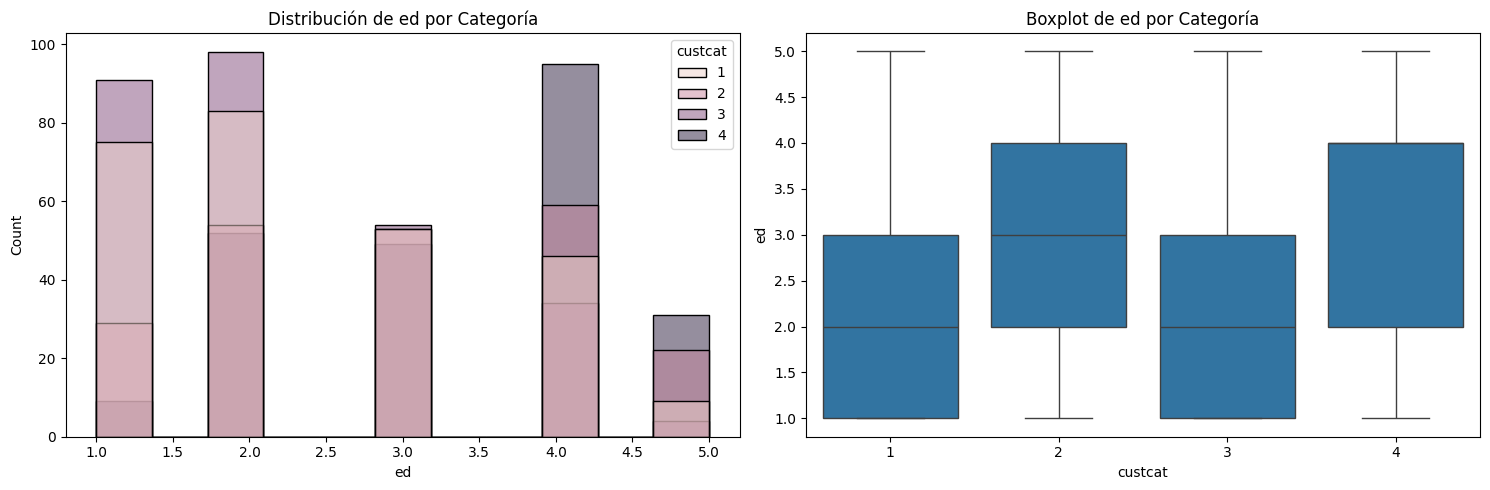

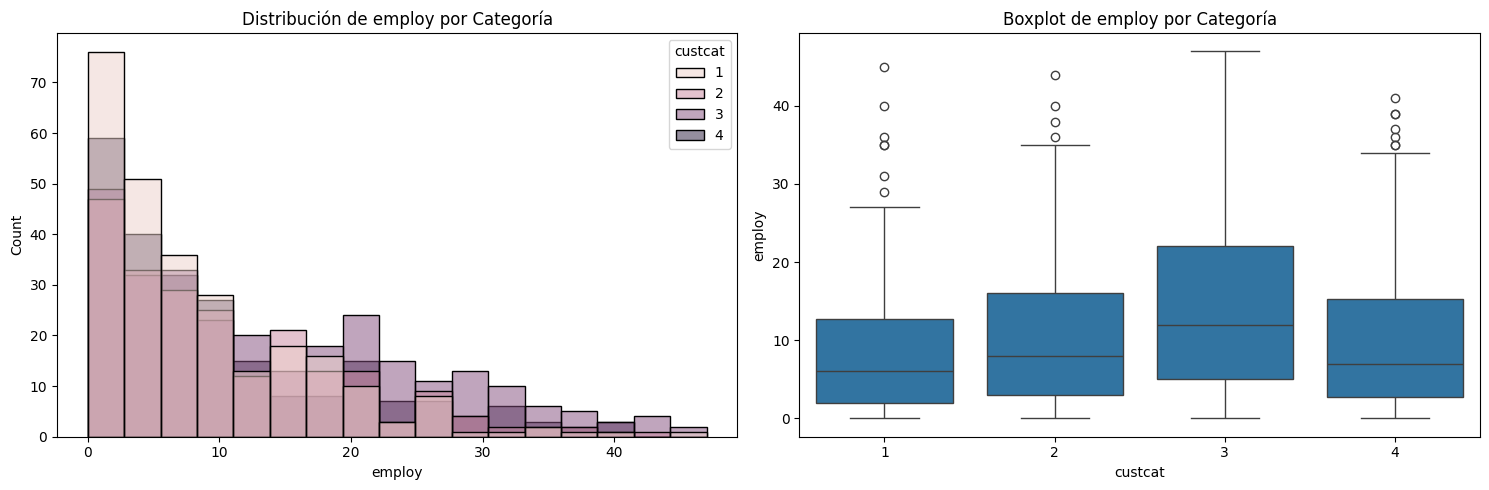

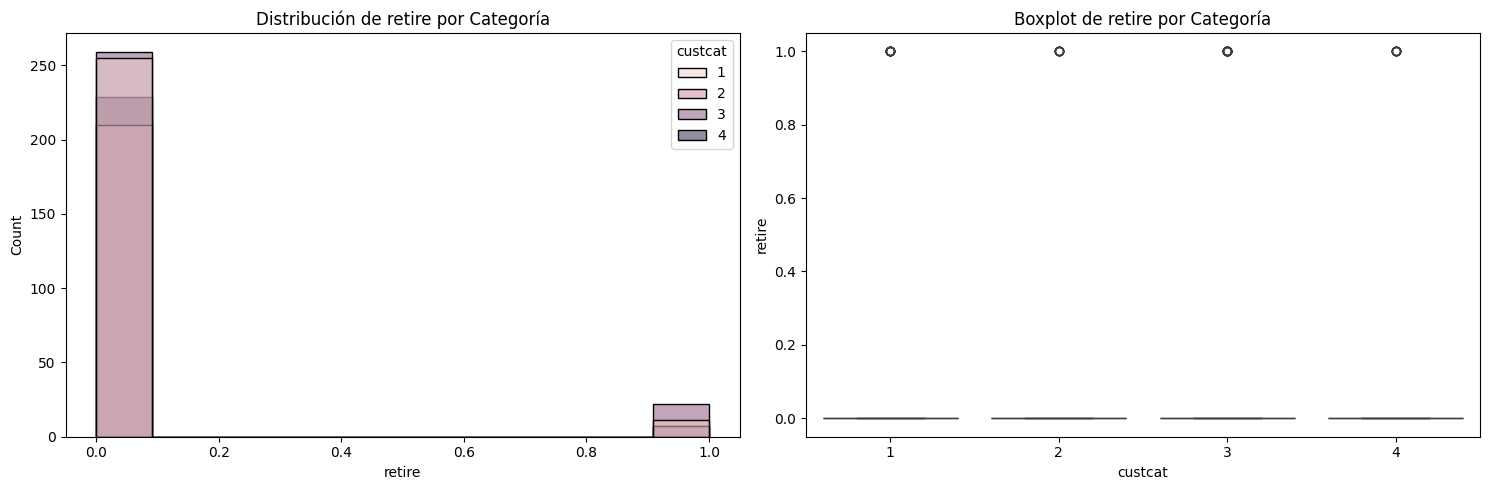

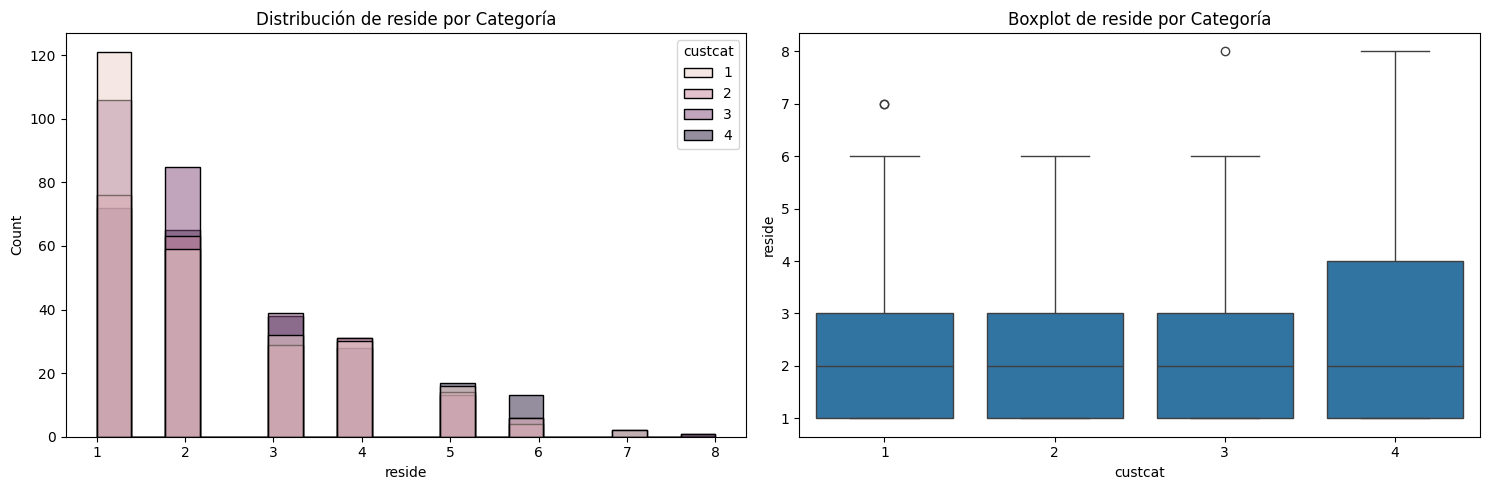

In [4]:
# Lista de variables numéricas
numeric_cols = ['tenure', 'age', 'income', 'ed', 'employ', 'retire', 'reside']

# Crear histogramas y boxplots
for col in numeric_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Histograma
    sns.histplot(data=df, x=col, hue='custcat', ax=ax1)
    ax1.set_title(f'Distribución de {col} por Categoría')

    # Boxplot
    sns.boxplot(data=df, y=col, x='custcat', ax=ax2)
    ax2.set_title(f'Boxplot de {col} por Categoría')

    plt.tight_layout()

# 5 Análisis de Variables Categóricas

<Figure size 1000x600 with 0 Axes>

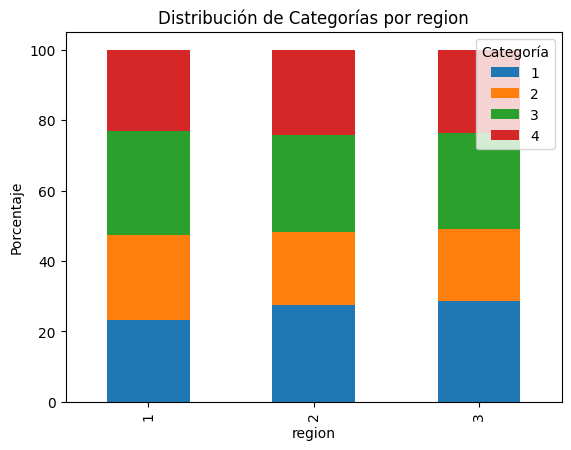

<Figure size 1000x600 with 0 Axes>

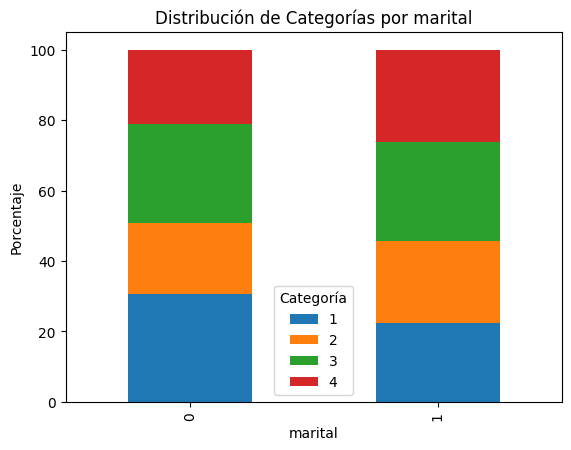

<Figure size 1000x600 with 0 Axes>

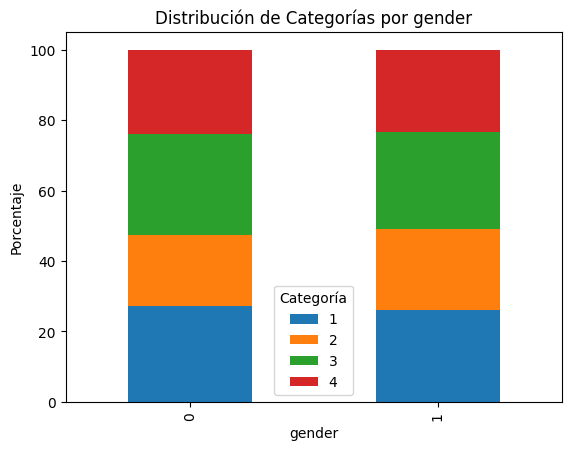

In [5]:
# Variables categóricas
cat_cols = ['region', 'marital', 'gender']

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(df[col], df['custcat'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Distribución de Categorías por {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    plt.legend(title='Categoría')

# 6 Análisis de Correlaciones

Text(0.5, 1.0, 'Matriz de Correlación')

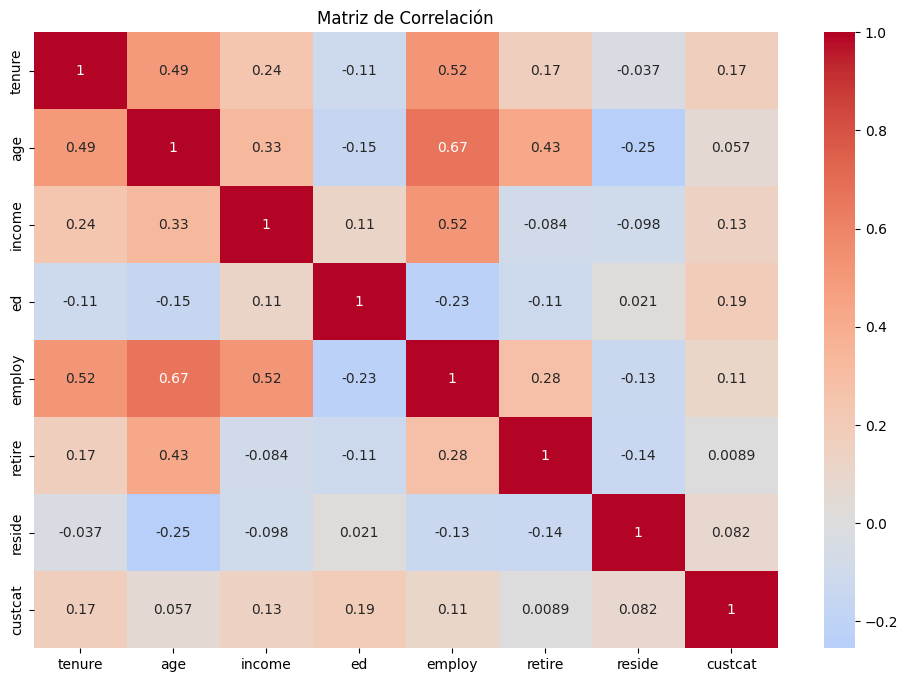

In [6]:
# Matriz de correlación para variables numéricas
corr_matrix = df[numeric_cols + ['custcat']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

# 7 Análisis de Outliers

In [7]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Detectar outliers en variables numéricas
for col in numeric_cols:
    n_outliers = detect_outliers(df, col)
    print(f"Outliers en {col}: {n_outliers}")

Outliers en tenure: 0
Outliers en age: 0
Outliers en income: 93
Outliers en ed: 0
Outliers en employ: 16
Outliers en retire: 47
Outliers en reside: 6


# 8 Análisis Estadístico

In [8]:
# Test de normalidad para variables numéricas
for col in numeric_cols:
    stat, p_value = stats.normaltest(df[col])
    print(f"\nTest de normalidad para {col}:")
    print(f"p-value: {p_value}")

# ANOVA para variables numéricas respecto a la clase
for col in numeric_cols:
    groups = [group for _, group in df.groupby('custcat')[col]]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\nANOVA para {col}:")
    print(f"p-value: {p_value}")


Test de normalidad para tenure:
p-value: 4.821850026996287e-204

Test de normalidad para age:
p-value: 4.218428873352217e-12

Test de normalidad para income:
p-value: 2.7388500059706293e-278

Test de normalidad para ed:
p-value: 5.122369412879244e-66

Test de normalidad para employ:
p-value: 4.717514073345994e-31

Test de normalidad para retire:
p-value: 1.2170133489370953e-190

Test de normalidad para reside:
p-value: 2.4632176971989817e-29

ANOVA para tenure:
p-value: 3.6551691072303725e-25

ANOVA para age:
p-value: 5.585814780810371e-05

ANOVA para income:
p-value: 0.00017986258909174615

ANOVA para ed:
p-value: 1.8619499710001118e-36

ANOVA para employ:
p-value: 9.288251554937859e-11

ANOVA para retire:
p-value: 0.029582741328674826

ANOVA para reside:
p-value: 0.00786180018205632


# 9 Feature Engineering Preliminar

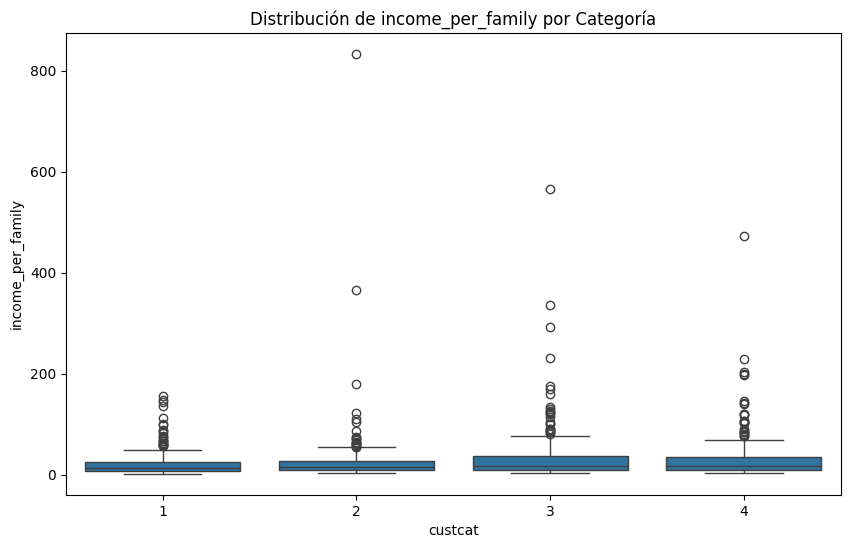

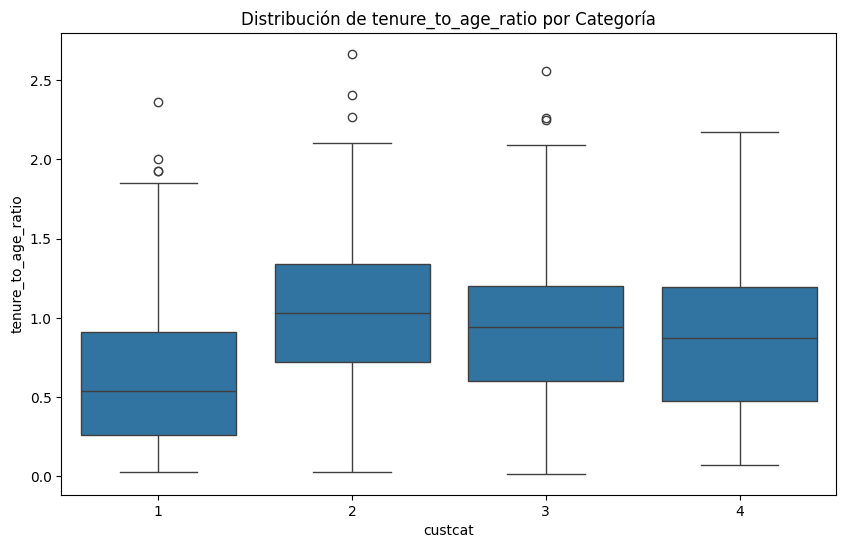

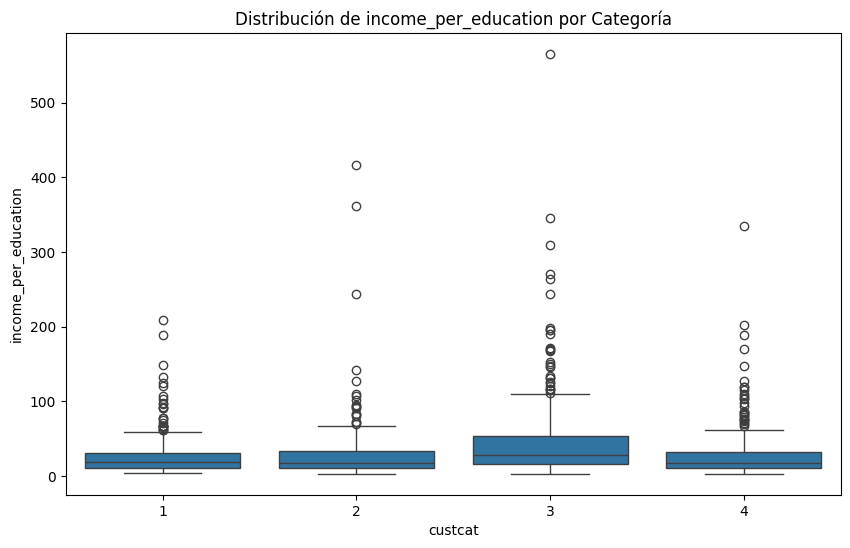

In [9]:
# Crear ratios y características derivadas
df['income_per_family'] = df['income'] / (df['reside'] + 1)
df['tenure_to_age_ratio'] = df['tenure'] / df['age']
df['income_per_education'] = df['income'] / df['ed']

# Analizar las nuevas características
for col in ['income_per_family', 'tenure_to_age_ratio', 'income_per_education']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='custcat', y=col)
    plt.title(f'Distribución de {col} por Categoría')

# 10 Resultado del análisis básico

In [10]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Información básica de las columnas
print(df.info())

# Distribución de la variable objetivo (custcat)
print(df['custcat'].value_counts(normalize=True) * 100)

Dimensiones del dataset: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                1000 non-null   int64  
 1   tenure                1000 non-null   int64  
 2   age                   1000 non-null   int64  
 3   marital               1000 non-null   int64  
 4   address               1000 non-null   int64  
 5   income                1000 non-null   float64
 6   ed                    1000 non-null   int64  
 7   employ                1000 non-null   int64  
 8   retire                1000 non-null   float64
 9   gender                1000 non-null   int64  
 10  reside                1000 non-null   int64  
 11  custcat               1000 non-null   int64  
 12  income_per_family     1000 non-null   float64
 13  tenure_to_age_ratio   1000 non-null   float64
 14  income_per_education  1000 non-null  

# 11 Plan de Preprocesamiento 

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

def preprocess_data(df):
    # Crear copia para no modificar datos originales
    df_processed = df.copy()

    # Transformación logarítmica para income (manejando valores cero)
    df_processed['income_log'] = np.log1p(df_processed['income'])

    # Transformación logarítmica para tenure
    df_processed['tenure_log'] = np.log1p(df_processed['tenure'])

    # Estandarización de variables numéricas
    scaler = StandardScaler()
    numeric_cols = ['age', 'address', 'ed', 'employ', 'reside']
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    # RobustScaler para variables con outliers
    robust_scaler = RobustScaler()
    robust_cols = ['income_log', 'tenure_log']
    df_processed[robust_cols] = robust_scaler.fit_transform(df_processed[robust_cols])

    # One-hot encoding para variables categóricas
    categorical_cols = ['region', 'marital', 'gender']
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, prefix=categorical_cols)

    return df_processed

 11.1 Features Engineering Adicional Recomendado

In [12]:
def create_features(df):
    # Ratios existentes
    df['income_per_family'] = df['income'] / (df['reside'] + 1)
    df['tenure_to_age_ratio'] = df['tenure'] / df['age']
    df['income_per_education'] = df['income'] / df['ed']

    # Nuevas características sugeridas
    df['age_segment'] = pd.qcut(df['age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Very Senior'])
    df['income_segment'] = pd.qcut(df['income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    df['tenure_segment'] = pd.qcut(df['tenure'], q=5, labels=['New', 'Recent', 'Established', 'Loyal', 'Very Loyal'])

    # Interacciones
    df['income_tenure_interaction'] = df['income'] * df['tenure']
    df['age_income_ratio'] = df['age'] / df['income']

    return df

11.2 Visualizaciones Recomendadas para Validar Transformaciones

In [13]:
def plot_transformations(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Original vs Transformed Income
    sns.histplot(df['income'], ax=axes[0,0])
    axes[0,0].set_title('Original Income Distribution')

    sns.histplot(np.log1p(df['income']), ax=axes[0,1])
    axes[0,1].set_title('Log Transformed Income Distribution')

    # Original vs Transformed Tenure
    sns.histplot(df['tenure'], ax=axes[1,0])
    axes[1,0].set_title('Original Tenure Distribution')

    sns.histplot(np.log1p(df['tenure']), ax=axes[1,1])
    axes[1,1].set_title('Log Transformed Tenure Distribution')

    plt.tight_layout()

Para confirmar que las transformaciones propuestas son adecuadas, veremos

> Distribución de las variables numéricas por categoría de cliente:
>
> La correlación entre variables
>
> Una vista rápida de la distribución de las variables categóricas

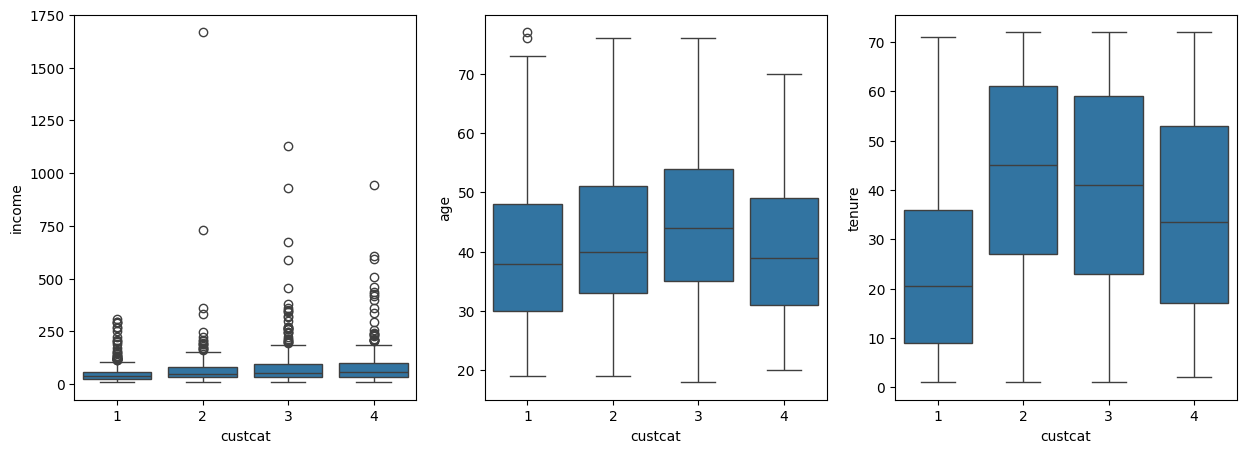

           income       age    tenure        ed    employ   custcat
income   1.000000  0.327948  0.242912  0.113939  0.516349  0.134525
age      0.327948  1.000000  0.490217 -0.154857  0.670047  0.056909
tenure   0.242912  0.490217  1.000000 -0.109797  0.520288  0.166691
ed       0.113939 -0.154857 -0.109797  1.000000 -0.228580  0.193864
employ   0.516349  0.670047  0.520288 -0.228580  1.000000  0.110011
custcat  0.134525  0.056909  0.166691  0.193864  0.110011  1.000000

Distribución de region:
region
3    34.4
2    33.4
1    32.2
Name: proportion, dtype: float64

Distribución de marital:
marital
0    50.5
1    49.5
Name: proportion, dtype: float64

Distribución de gender:
gender
1    51.7
0    48.3
Name: proportion, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Para income, age y tenure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='custcat', y='income', ax=axes[0])
sns.boxplot(data=df, x='custcat', y='age', ax=axes[1])
sns.boxplot(data=df, x='custcat', y='tenure', ax=axes[2])
plt.show()

# Matriz de correlación de las variables numéricas principales
corr = df[['income', 'age', 'tenure', 'ed', 'employ', 'custcat']].corr()
print(corr)

# Para region, marital y gender
for col in ['region', 'marital', 'gender']:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True) * 100)

In [20]:
# Mostrar las primeras filas del dataset procesado
print("\n=== Primeras filas del dataset procesado ===")
print(df.head())


# Guardar el DataFrame procesado
df.to_csv('../data/proc_escal.csv', index=False)
print("\nDataFrame procesado guardado")


=== Primeras filas del dataset procesado ===
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  income_per_family  tenure_to_age_ratio  \
0       2        1          21.333333             0.295455   
1       6        4          19.428571             0.333333   
2       2        3          38.666667             1.307692   
3       1        1          16.500000             1.000000   
4       4        3           6.000000             0.766667   

   income_per_education  
0                  16.0  
1                  27.2  
2                 116.

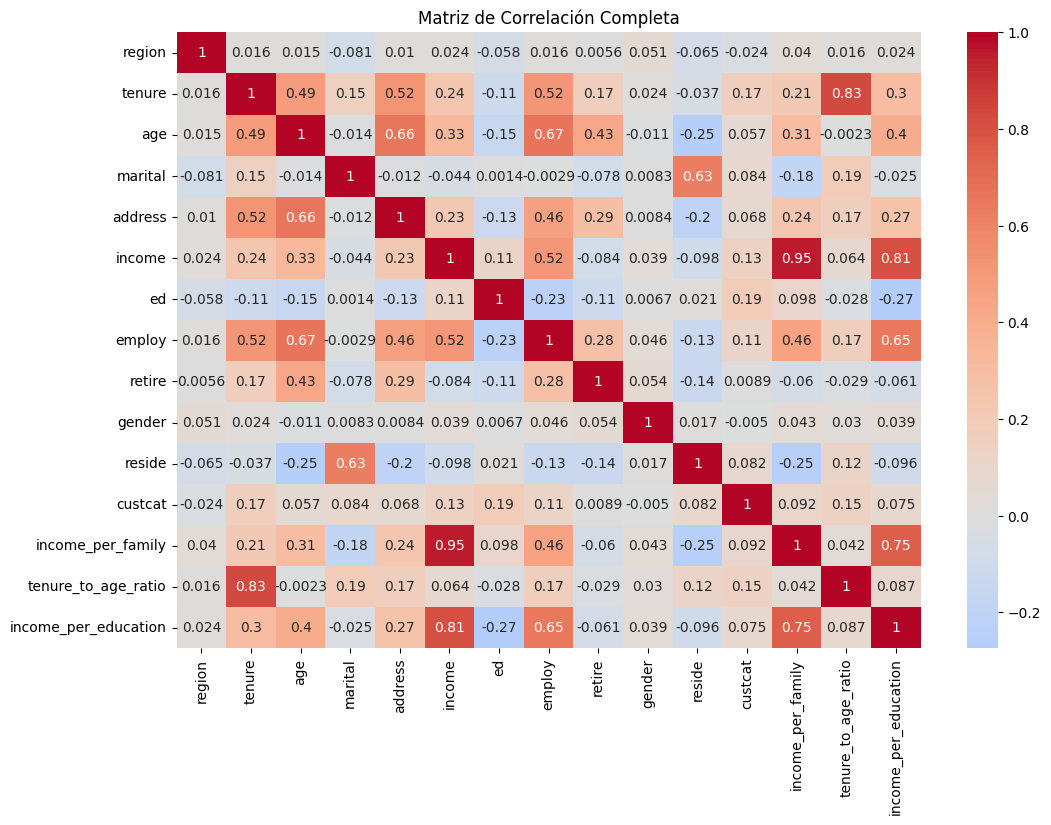

In [21]:
# Matriz de correlación para todas las variables numéricas
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación Completa')
plt.show()

# 12 Entrenar el Modelo 

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import optuna
from sklearn.metrics import accuracy_score, classification_report

class CustomDataset(Dataset):
    def __init__(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class NeuralNet(nn.Module):
    def __init__(self, input_size, trial):
        super(NeuralNet, self).__init__()
        self.n_layers = trial.suggest_int("n_layers", 2, 4)
        self.hidden_size = trial.suggest_int("hidden_size", 32, 256)
        self.dropout = trial.suggest_float("dropout", 0.1, 0.5)

        layers = []
        in_features = input_size

        for i in range(self.n_layers):
            out_features = self.hidden_size // (2 ** i)
            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(out_features))
            layers.append(nn.Dropout(self.dropout))
            in_features = out_features

        layers.append(nn.Linear(in_features, 4))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def process_features(df):
    # Identify numeric and categorical columns
    numeric_cols = ['tenure', 'age', 'income', 'ed', 'employ', 'retire', 'reside']
    categorical_cols = ['region', 'marital', 'gender']

    # Process numeric columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Process categorical columns
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    # Drop any unwanted columns
    cols_to_keep = numeric_cols + categorical_cols
    df = df[cols_to_keep]

    return df.astype(float)

def train_evaluate(model, optimizer, criterion, train_loader, val_loader, patience=10):
    best_val_acc = 0
    patience_counter = 0
    train_acc = 0

    for epoch in range(100):
        # Training
        model.train()
        train_preds, train_true = [], []

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            train_preds.extend(predicted.numpy())
            train_true.extend(batch_y.numpy())

        train_acc = accuracy_score(train_true, train_preds)

        # Validation
        model.eval()
        val_preds, val_true = [], []

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                val_preds.extend(predicted.numpy())
                val_true.extend(batch_y.numpy())

        val_acc = accuracy_score(val_true, val_preds)

        # Early stopping with controlled overfitting (>5%)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience and (train_acc - val_acc) > 0.05:
            break

    return train_acc, val_acc

def objective(trial):
    batch_size = trial.suggest_int("batch_size", 16, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    model = NeuralNet(X_train.shape[1], trial)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    train_acc, val_acc = train_evaluate(model, optimizer, criterion, train_loader, val_loader)
    return val_acc

# Main execution
if __name__ == "__main__":
    # Load data
    df = pd.read_csv('../data/proc_escal.csv')
    y = df['custcat'].values - 1
    X = process_features(df.drop(['custcat'], axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Optimize
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)

    # Final evaluation
    print(f"Best parameters: {study.best_trial.params}")
    print(f"Best validation accuracy: {study.best_trial.value:.4f}")

    final_model = NeuralNet(X_train.shape[1], study.best_trial)
    final_dataset = CustomDataset(X_test, y_test)
    final_loader = DataLoader(final_dataset, batch_size=32)

    # Test set evaluation
    final_model.eval()
    test_preds = []
    test_true = []

    with torch.no_grad():
        for batch_X, batch_y in final_loader:
            outputs = final_model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            test_preds.extend(predicted.numpy())
            test_true.extend(batch_y.numpy())

    print("\nTest Set Performance:")
    print(classification_report(test_true, test_preds))

c:\Users\Administrator\Desktop\telecom_customer\ML-Refuerzo-Freddy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-05 17:12:10,571] A new study created in memory with name: no-name-10ae356b-b7e6-4da7-9700-7200415932da
[I 2024-12-05 17:12:13,038] Trial 0 finished with value: 0.4125 and parameters: {'batch_size': 93, 'lr': 0.006022114454826156, 'weight_decay': 3.853648655865761e-05, 'n_layers': 2, 'hidden_size': 49, 'dropout': 0.20122239277743426}. Best is trial 0 with value: 0.4125.
[I 2024-12-05 17:12:15,171] Trial 1 finished with value: 0.39375 and parameters: {'batch_size': 66, 'lr': 0.002826758703222811, 'weight_decay': 3.347475560650898e-05, 'n_layers': 4, 'hidden_size': 108, 'dropout': 0.30630786261530624}. Best is trial 0 with value: 0.4125.
[I 2024-12-05 17:12:17,119] Trial 2 finished with v

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 212])